<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/project_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 3.4MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=3d95f7eb0b4bf8f3b8704a1740e83ade5e5243ea4d7ac70642b9fd1bb4254e8e
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [ ]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [ ]:
import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [ ]:
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  #Parameters can be seen as list beta and gamma

In [ ]:
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [ ]:
beta_list = []
for i in range(1000):
  for j in range(10):
    beta_list.append(beta[i])

In [ ]:
import pandas as pd
Beta = pd.DataFrame(beta_list)

In [ ]:

from random import sample

In [ ]:
S_value = pd.DataFrame(P)
S_value.to_csv("Susceptible.csv")

In [ ]:
I_value = pd.DataFrame(Q)
I_value.to_csv("Infected.csv")

In [ ]:
R_value = pd.DataFrame(M)
R_value.to_csv("Recovered.csv")

In [ ]:
S_list = []
S_actual = []
I_list = []
I_actual = []
R_list = []
R_actual = []
for i in range(1000):
  p = sample(range(0, 99), 1)
  S_list.append(S_value[p].iloc[i].to_list())
  S_actual.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_actual.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_actual.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [ ]:
S_actual

[[202.84653411829976],
 [202.84748132029236],
 [998.9980760862119],
 [202.84601623763805],
 [207.6992087528951],
 [739.1680739342378],
 [410.31127882699036],
 [202.84589959144384],
 [932.1841450039851],
 [202.845909267205],
 [202.84589959180434],
 [202.8458995982933],
 [204.96231887635653],
 [202.84591879225454],
 [993.7608907151453],
 [964.0131401734702],
 [202.84589959180929],
 [202.84589959432796],
 [998.4468050753226],
 [202.89146906539966],
 [202.84888815406023],
 [202.84627522560066],
 [202.84589959162415],
 [957.6923291753559],
 [202.84589959176623],
 [202.8465623733027],
 [204.15047508397117],
 [955.0036718128142],
 [211.41537551708896],
 [202.8997650372696],
 [342.5840714329305],
 [960.8408093011233],
 [202.84589959728285],
 [209.3916443564108],
 [202.84589959168633],
 [988.3202980904467],
 [961.1086403523934],
 [998.4376153012814],
 [202.8458995915157],
 [783.0122867574231],
 [995.2951761956102],
 [964.571908613956],
 [259.4514837723997],
 [202.84589959188918],
 [202.84589959

In [ ]:
sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]
  



In [ ]:
infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i]
  



In [ ]:
recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  



In [ ]:
susactual_list = []
for i in range(1000):
 susactual_list = susactual_list+S_actual[i]

In [ ]:
infectedactual_list = []
for i in range(1000):
 infectedactual_list = infectedactual_list+I_actual[i]

In [ ]:
recovactual_list = []
for i in range(1000):
 recovactual_list = recovactual_list+R_actual[i]

In [ ]:
df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susactual_list)
df_5 = pd.DataFrame(infectedactual_list)
df_6 = pd.DataFrame(recovactual_list)
beta_actual = pd.DataFrame(beta)


In [ ]:
data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,beta_actual], axis=1)


In [ ]:
data.columns = range(data.shape[1])
data

,0,1,2,3,4,5,6
0,202.846906,1.473786e-03,797.151621,202.846534,9.295315e-04,797.152536,1.551083
1,202.848292,3.504918e-03,797.148203,202.847481,2.317099e-03,797.150202,1.392724
2,998.998461,1.000769e+00,0.000770,998.998076,1.000961e+00,0.000963,0.000385
3,202.846099,2.919512e-04,797.153609,202.846016,1.708772e-04,797.153813,1.802569
4,209.661692,9.708541e+00,780.629767,207.699209,6.968864e+00,785.331927,1.137893
...,...,...,...,...,...,...,...
995,202.845934,5.031423e-05,797.154016,202.845922,3.228201e-05,797.154046,1.493434
996,456.013378,1.518703e+02,392.116317,440.839598,1.501236e+02,409.036848,0.224057
997,202.845900,-3.757181e-10,797.154100,202.845900,-4.170842e-10,797.154100,1.818638
998,202.857932,1.762542e-02,797.124443,202.854753,1.296933e-02,797.132278,1.032346


In [ ]:
X = data[[0,1,2,3,4,5]]
y = data[6]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [ ]:
X_train

,0,1,2,3,4,5
29,202.910237,9.422390e-02,796.995539,202.899765,7.889123e-02,797.021344
535,697.109063,1.229845e+02,179.906454,659.725560,1.328090e+02,207.465426
695,202.846617,1.051654e-03,797.152331,202.846448,8.038281e-04,797.152748
557,254.287900,6.156826e+01,684.143837,251.013021,5.836200e+01,690.624976
836,202.871429,3.739500e-02,797.091176,202.862255,2.395718e-02,797.113788
...,...,...,...,...,...,...
106,995.709055,2.641106e+00,1.649839,995.170308,2.909246e+00,1.920446
270,995.494470,2.747925e+00,1.757605,995.299476,2.844971e+00,1.855553
860,202.845900,8.173108e-08,797.154100,202.845900,5.444299e-08,797.154100
435,710.189762,1.191989e+02,170.611288,603.337395,1.445235e+02,252.139107


In [ ]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
  
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)

# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.3647626641500414
R2 score of training set is 0.5923302411801955


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.3847807341105006
R2 score of test set is 0.5856279405993265


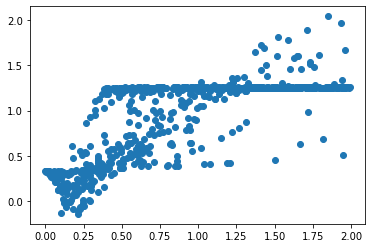

In [ ]:
plt.scatter(y_train,y_train_predicted)

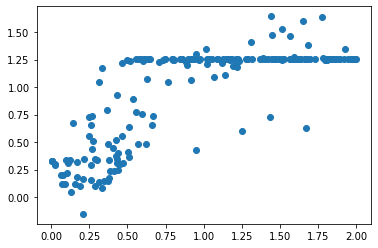

In [ ]:
plt.scatter(y_test,y_test_predict)

In [ ]:
test = np.sqrt((y_test - y_test_predict)**2)

In [ ]:
train = np.sqrt((y_train - y_train_predicted)**2)

In [ ]:
train_list = []
for i in range(1,801):
  train_list.append(i)

In [ ]:
test_list  = []
for i in range(1,201):
  test_list.append(i)

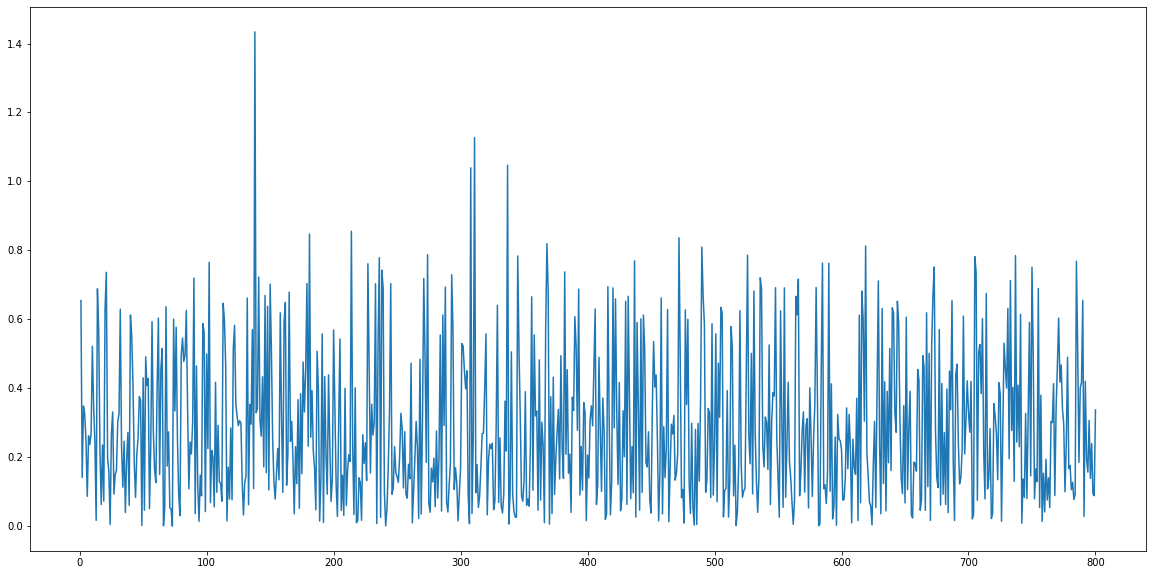

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_list,train)

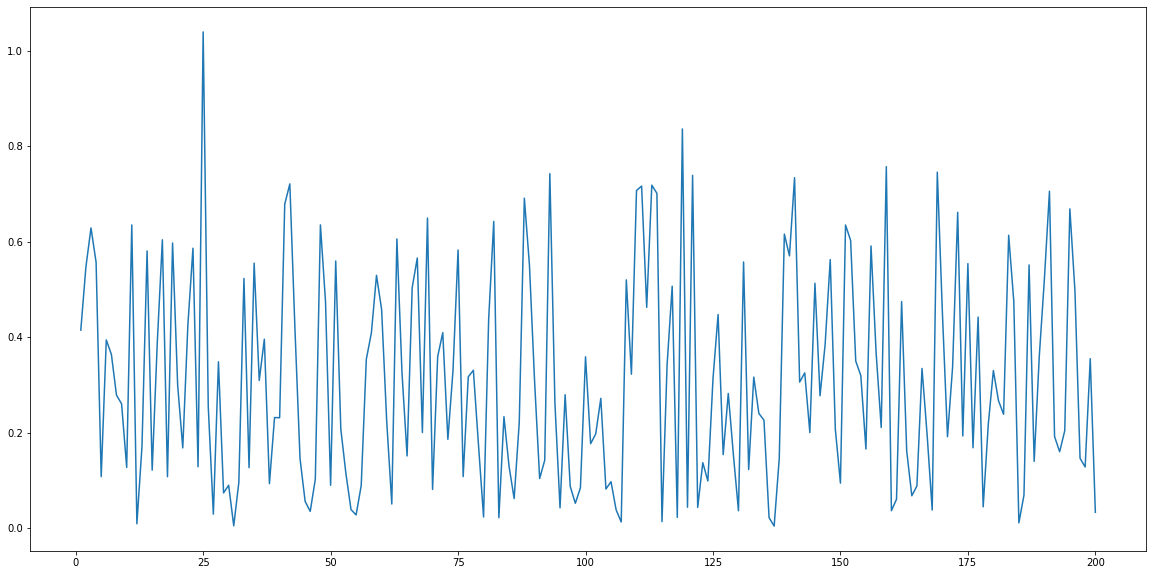

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(test_list,test)

In [ ]:
test = np.sqrt((y_test - y_test_predict)**2)
test.sum()

62.437468853400375

In [ ]:
train = np.sqrt((y_train - y_train_predicted)**2)

In [ ]:
train.sum()

230.44559624395905